In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('ggplot')

In [16]:
df = pd.read_csv(r'C:\Users\Wasee\OneDrive\Documents\Book2.csv')
print("Dataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Company                                   9 non-null      object
 1   Fiscal Year                               9 non-null      int64 
 2   Total Revenue (USD Millions)              9 non-null      object
 3   Net Income (USD Millions)                 9 non-null      object
 4   Total Assets (USD Millions)               9 non-null      object
 5   Total Liabilities (USD Millions)          9 non-null      object
 6   Cash Flow from Operations (USD Millions)  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 636.0+ bytes
None

First 5 rows:
     Company  Fiscal Year Total Revenue (USD Millions)  \
0      Apple         2024                     3,91,035   
1      Apple         2023                     3,83,285   


In [20]:
numeric_cols = ['Total Revenue (USD Millions)', 'Net Income (USD Millions)', 
                'Total Assets (USD Millions)', 'Total Liabilities (USD Millions)', 
                'Cash Flow from Operations (USD Millions)']
for col in numeric_cols:
    try:
        df[col] = df[col].astype(str).str.replace(',', '').str.replace('"', '').astype(float)
    except Exception as e:
        print(f"Error processing column {col}: {str(e)}")
        df[col] = pd.to_numeric(df[col].astype(str).str.replace('[^0-9.-]', '', regex=True), errors='coerce')


In [21]:
try:
    df['Profit Margin (%)'] = (df['Net Income (USD Millions)'] / df['Total Revenue (USD Millions)']) * 100
    df['Debt to Assets Ratio'] = df['Total Liabilities (USD Millions)'] / df['Total Assets (USD Millions)']
    df['ROA (%)'] = (df['Net Income (USD Millions)'] / df['Total Assets (USD Millions)']) * 100
except Exception as e:
    print(f"Error calculating metrics: {str(e)}")

In [22]:
print("\nDataset Information:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Company                                   9 non-null      object 
 1   Fiscal Year                               9 non-null      int64  
 2   Total Revenue (USD Millions)              9 non-null      float64
 3   Net Income (USD Millions)                 9 non-null      float64
 4   Total Assets (USD Millions)               9 non-null      float64
 5   Total Liabilities (USD Millions)          9 non-null      float64
 6   Cash Flow from Operations (USD Millions)  9 non-null      float64
 7   Profit Margin (%)                         9 non-null      float64
 8   Debt to Assets Ratio                      9 non-null      float64
 9   ROA (%)                                   9 non-null      float64
dtypes: float64(8), int64

In [23]:
def plot_time_series(data, y_col, title):
    try:
        plt.figure(figsize=(14, 6))
        sns.lineplot(data=data, x='Fiscal Year', y=y_col, hue='Company', marker='o', linewidth=2.5)
        plt.title(title, fontsize=14)
        plt.ylabel(y_col, fontsize=12)
        plt.xlabel('Fiscal Year', fontsize=12)
        plt.xticks(data['Fiscal Year'].unique())
        plt.show()
    except Exception as e:
        print(f"Error creating {title} plot: {str(e)}")

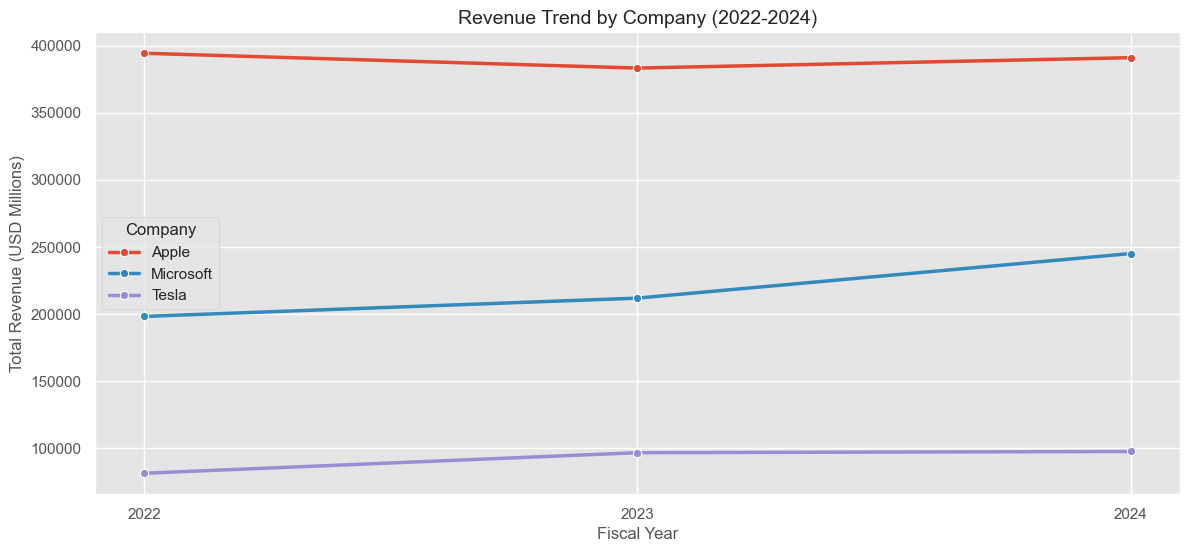

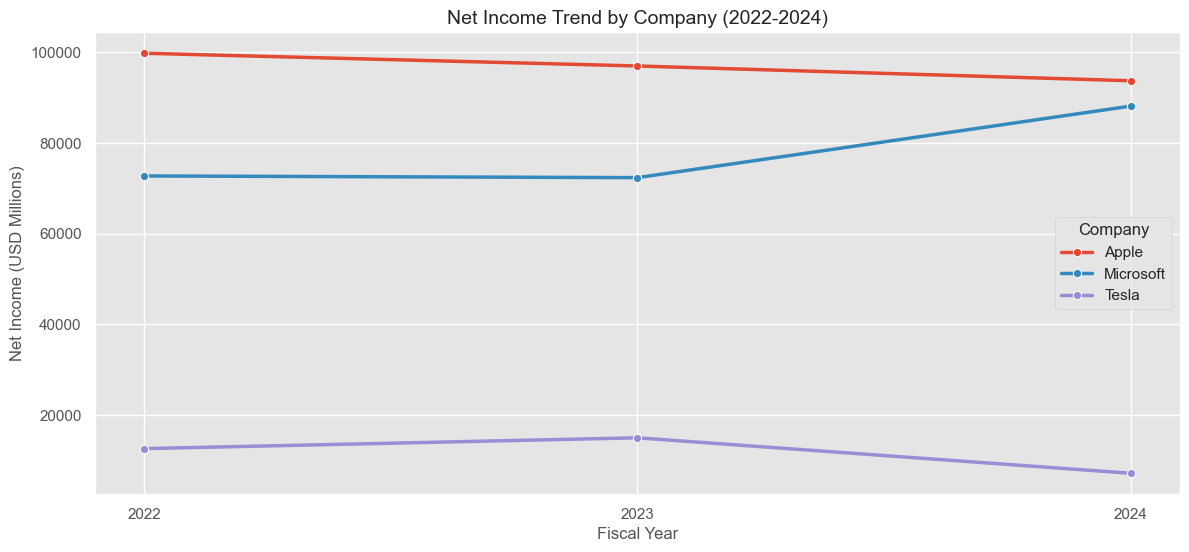

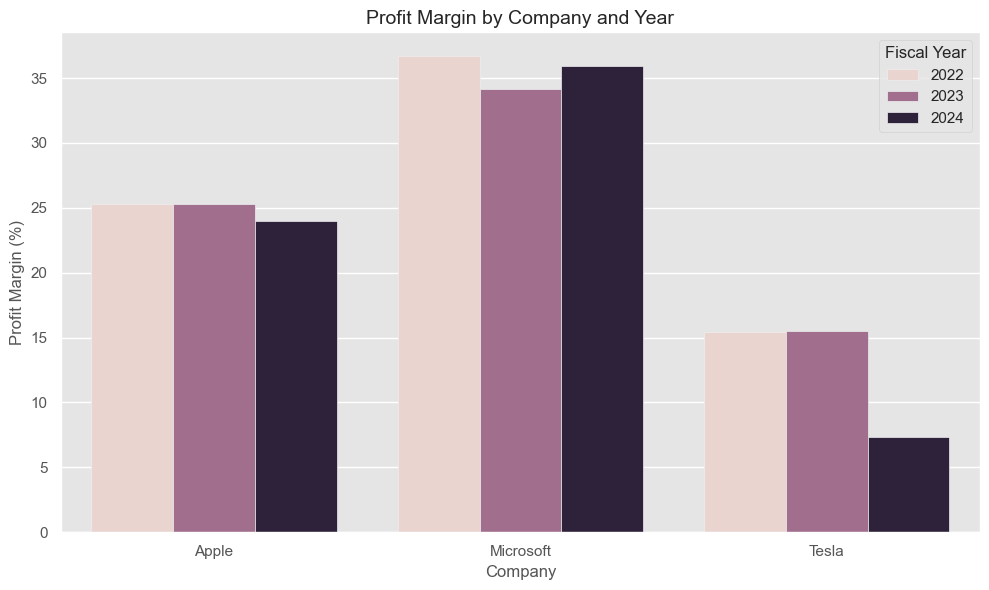

In [29]:
def plot_comparison(data, x_col, y_col, title):
    try:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x=x_col, y=y_col, hue='Fiscal Year')
        plt.title(title, fontsize=14)
        plt.ylabel(y_col, fontsize=12)
        plt.xlabel(x_col, fontsize=12)
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error creating {title} plot: {str(e)}")
plot_time_series(df, 'Total Revenue (USD Millions)', 'Revenue Trend by Company (2022-2024)')
plot_time_series(df, 'Net Income (USD Millions)', 'Net Income Trend by Company (2022-2024)')
plot_comparison(df, 'Company', 'Profit Margin (%)', 'Profit Margin by Company and Year')

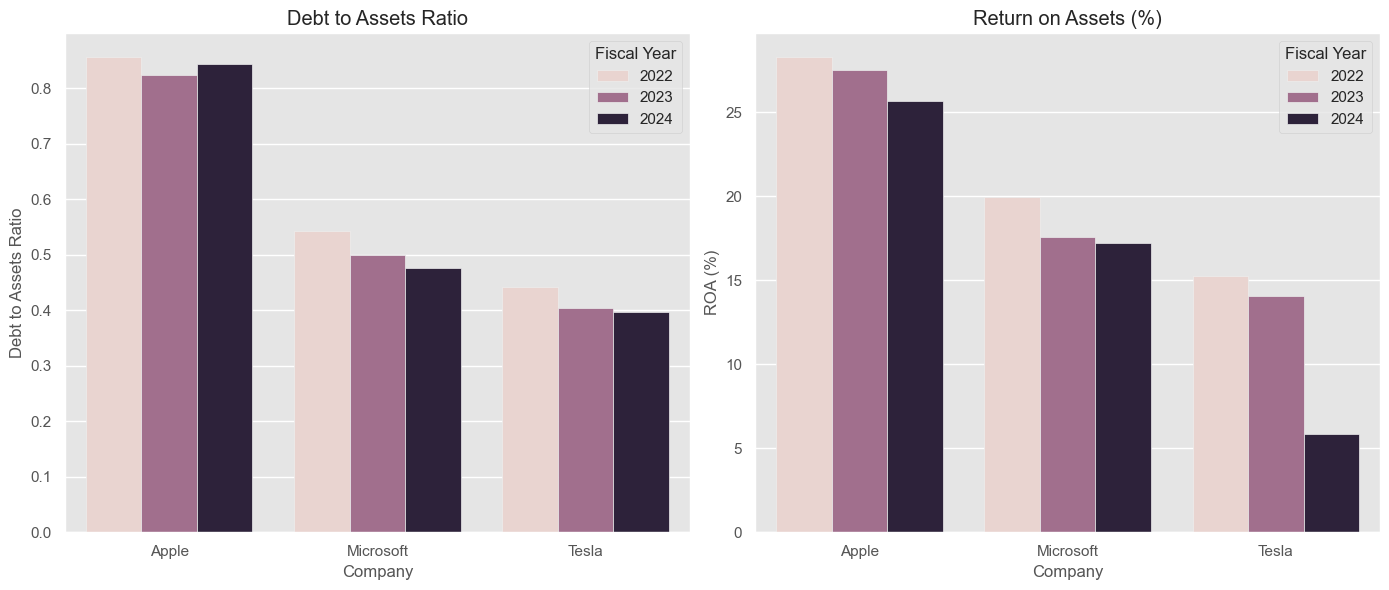

In [30]:
try:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=df, x='Company', y='Debt to Assets Ratio', hue='Fiscal Year')
    plt.title('Debt to Assets Ratio')
    
    plt.subplot(1, 2, 2)
    sns.barplot(data=df, x='Company', y='ROA (%)', hue='Fiscal Year')
    plt.title('Return on Assets (%)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error creating financial health plots: {str(e)}")

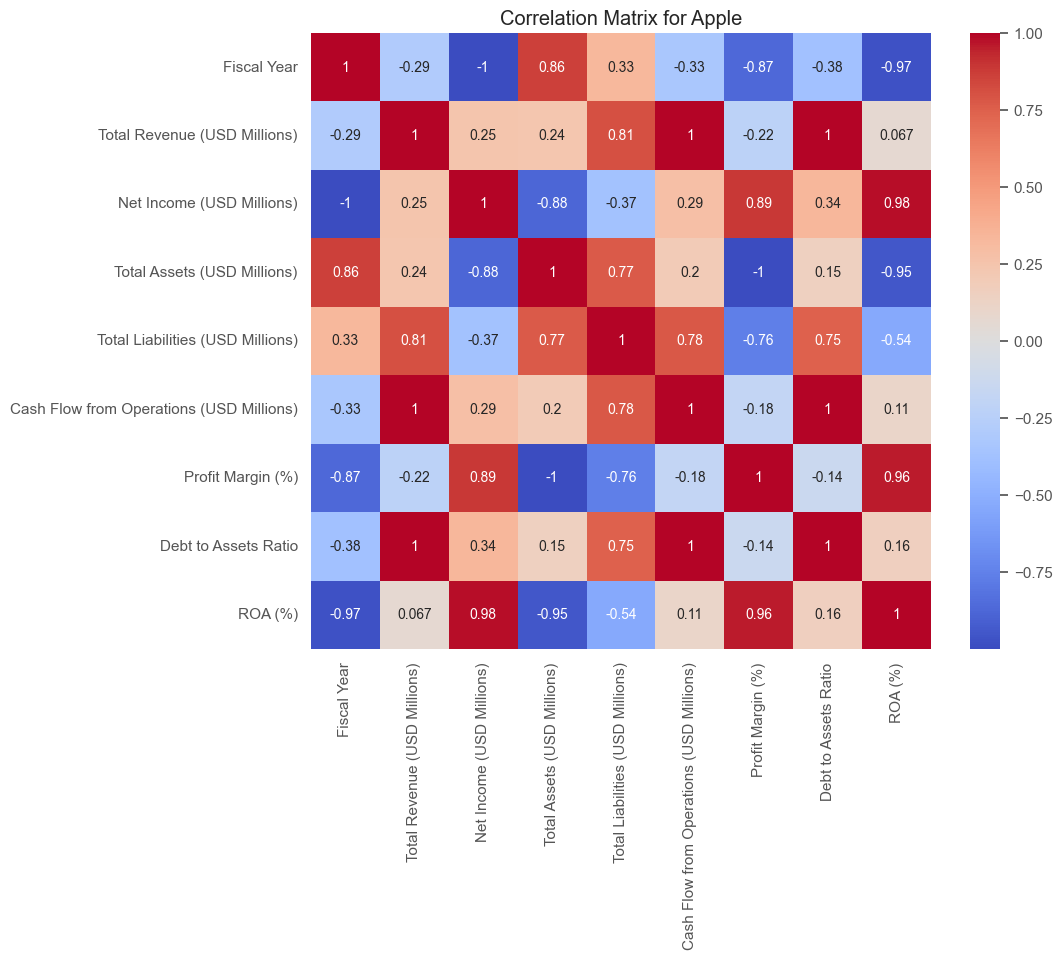

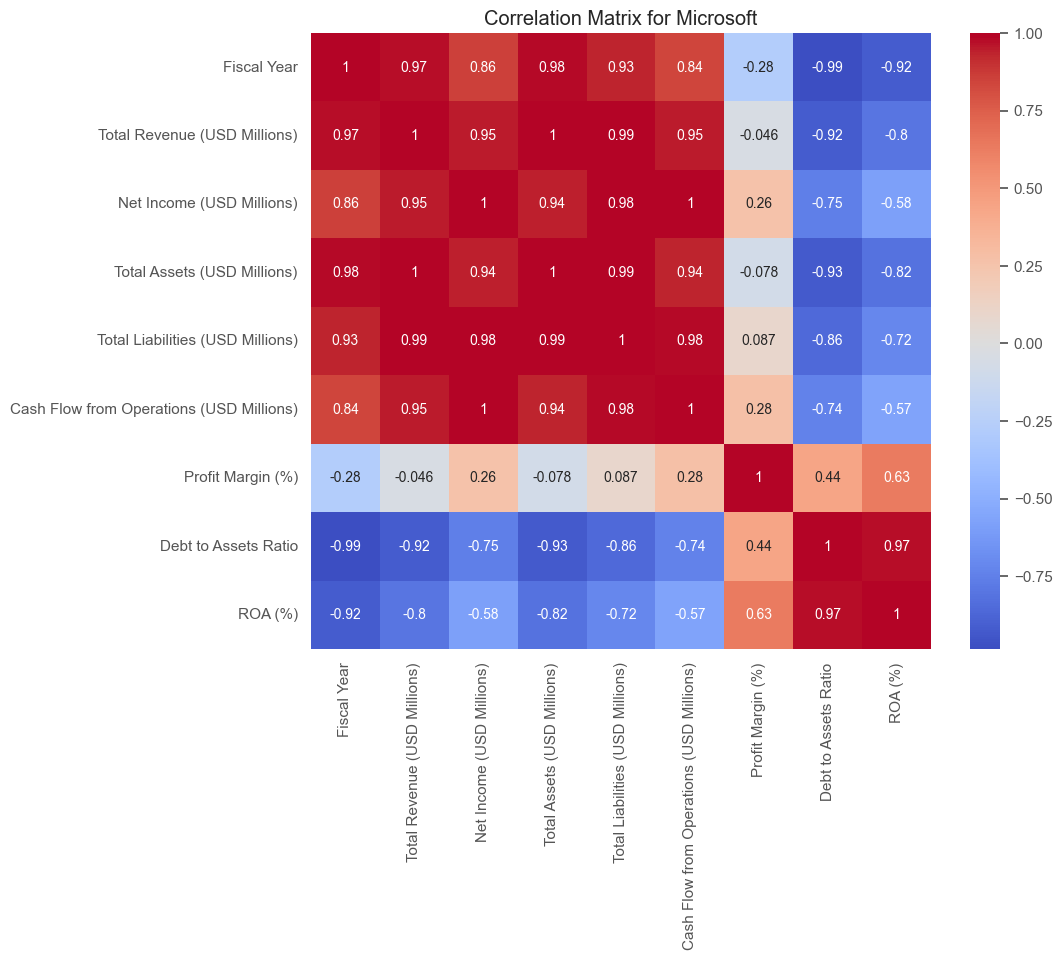

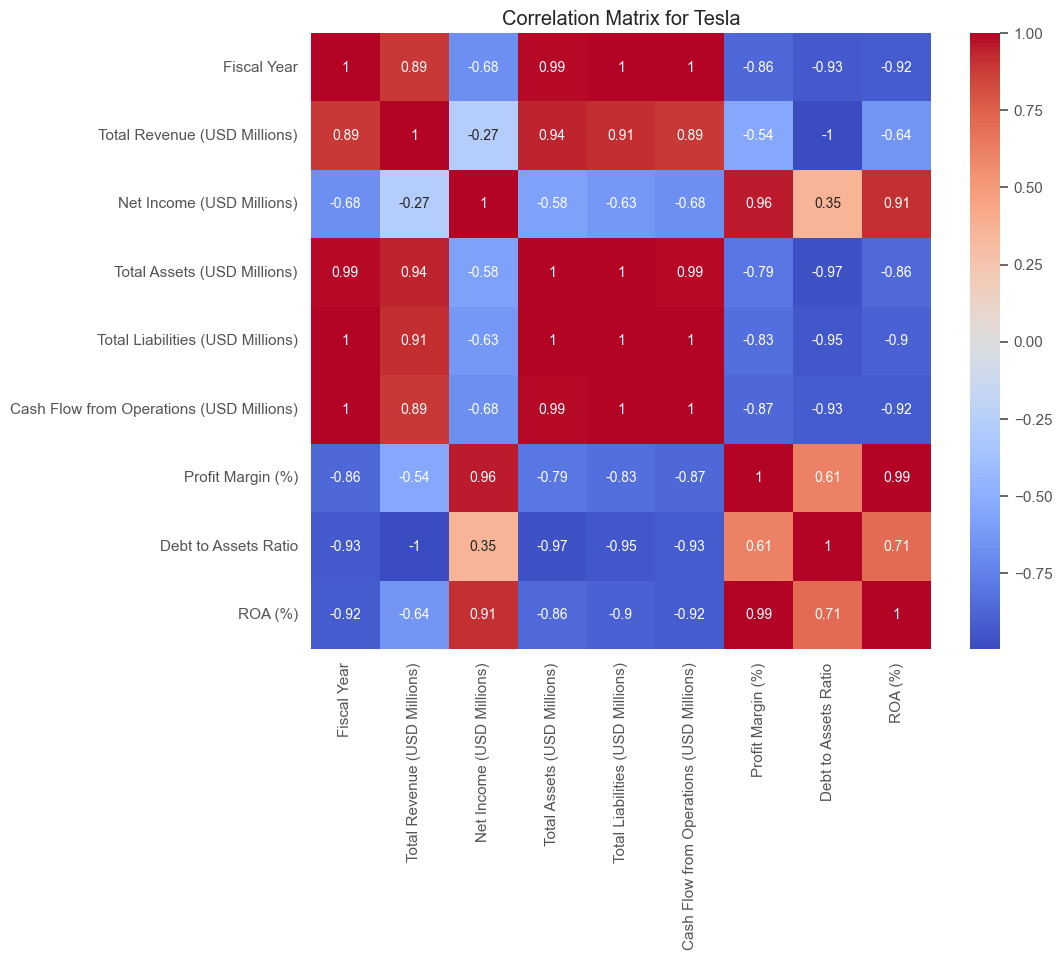

In [31]:
try:
    for company in df['Company'].unique():
        corr_matrix = df[df['Company'] == company].select_dtypes(include=[np.number]).corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title(f'Correlation Matrix for {company}')
        plt.show()
except Exception as e:
    print(f"Error creating correlation matrices: {str(e)}")


In [34]:
def calculate_growth(df, company, metric):
    try:
        company_data = df[df['Company'] == company].sort_values('Fiscal Year')
        growth = company_data[metric].pct_change() * 100
        return growth
    except Exception as e:
        print(f"Error calculating growth for {company} {metric}: {str(e)}")
        return None




Growth Rates for Apple:
   Fiscal Year  Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)
1         2023           -2.800461              -2.813543          -0.048759
0         2024            2.021994              -3.359967           3.516052


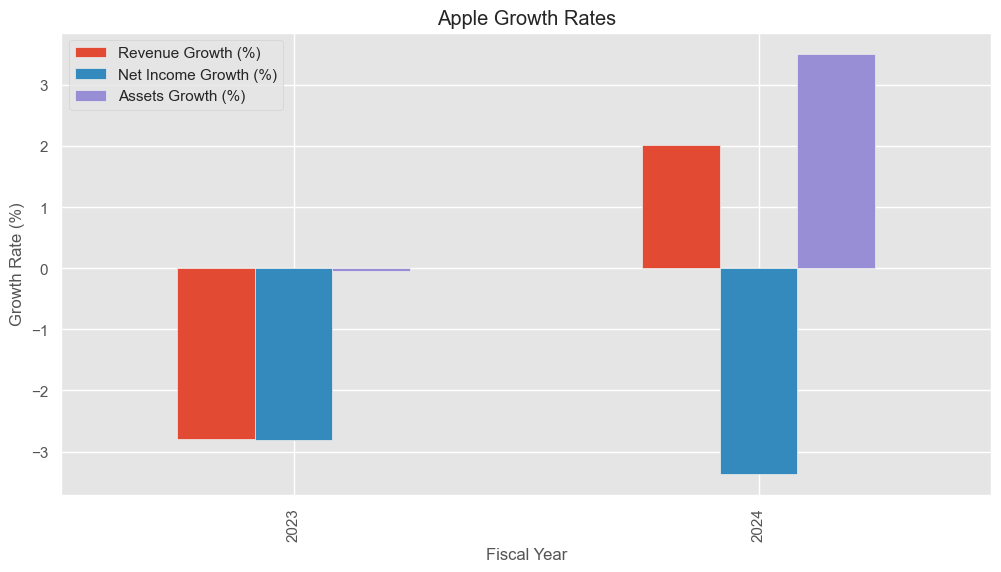


Growth Rates for Microsoft:
   Fiscal Year  Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)
4         2023            6.882030              -0.518299          12.919636
3         2024           15.669962              21.800417          24.318650


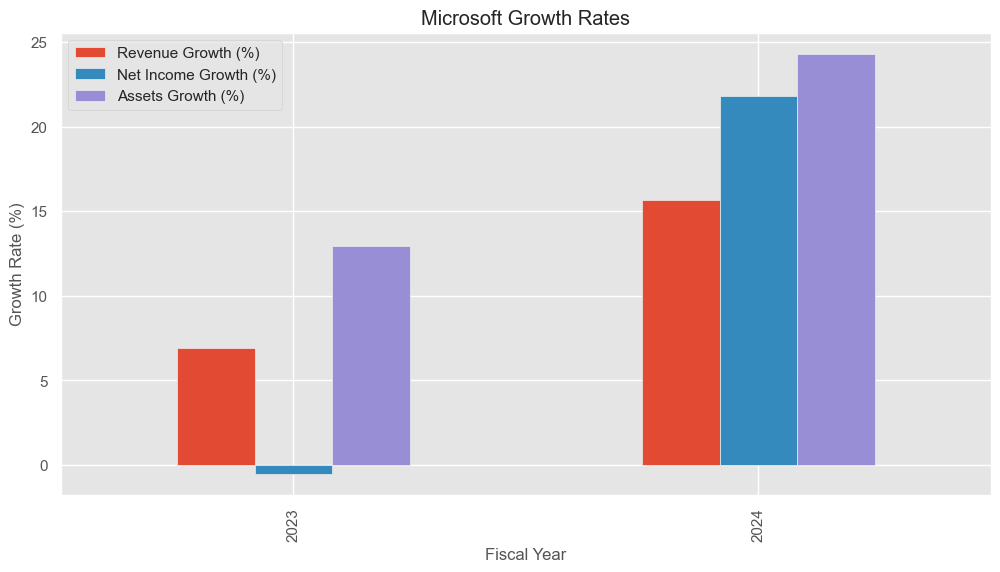


Growth Rates for Tesla:
   Fiscal Year  Revenue Growth (%)  Net Income Growth (%)  Assets Growth (%)
7         2023           18.795267              18.964010          29.488207
6         2024            0.947578             -52.230533          14.492862


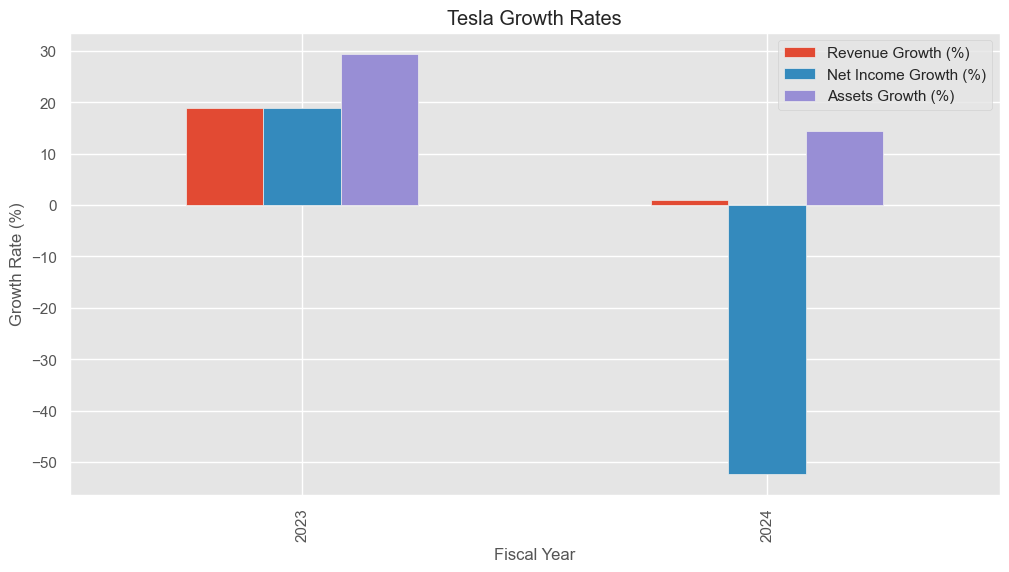

In [35]:
try:
    for company in df['Company'].unique():
        print(f"\nGrowth Rates for {company}:")
        company_data = df[df['Company'] == company].sort_values('Fiscal Year')
        
        growth_df = pd.DataFrame({
            'Fiscal Year': company_data['Fiscal Year'],
            'Revenue Growth (%)': calculate_growth(df, company, 'Total Revenue (USD Millions)'),
            'Net Income Growth (%)': calculate_growth(df, company, 'Net Income (USD Millions)'),
            'Assets Growth (%)': calculate_growth(df, company, 'Total Assets (USD Millions)')
        }).dropna()
        
        print(growth_df)
        
        if not growth_df.empty:
            growth_df.plot(x='Fiscal Year', kind='bar', figsize=(12, 6), 
                          title=f'{company} Growth Rates')
            plt.ylabel('Growth Rate (%)')
            plt.show()
except Exception as e:
    print(f"Error in growth rate analysis: {str(e)}")

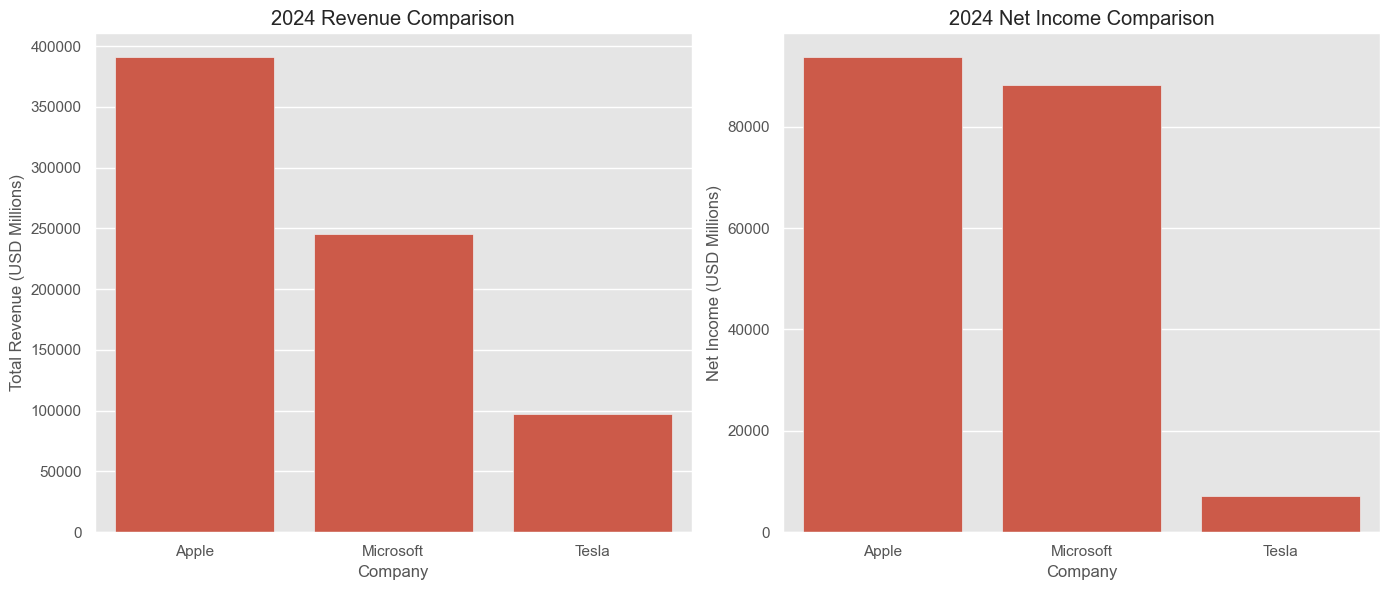

In [36]:
try:
    latest_year = df[df['Fiscal Year'] == df['Fiscal Year'].max()]
    
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(data=latest_year, x='Company', y='Total Revenue (USD Millions)')
    plt.title(f'{latest_year["Fiscal Year"].iloc[0]} Revenue Comparison')
    
    plt.subplot(1, 2, 2)
    sns.barplot(data=latest_year, x='Company', y='Net Income (USD Millions)')
    plt.title(f'{latest_year["Fiscal Year"].iloc[0]} Net Income Comparison')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error in comparative analysis: {str(e)}")